# importing Library


In [29]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Load Dataset

In [30]:
(x_train,y_train),(x_test,y_test)=keras.datasets.mnist.load_data()

In [31]:
#check the shape
x_train.shape,x_test.shape

((60000, 28, 28), (10000, 28, 28))

In [32]:
x_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

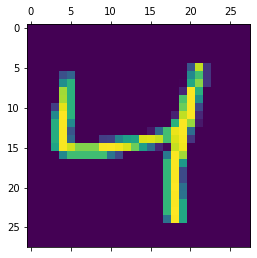

In [33]:
# see the image
plt.matshow(x_train[2])

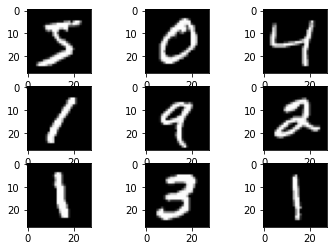

In [34]:
# visualize the data
for i in range(9):
    plt.subplot(3,3,i+1)
    #plot the pixel data
    plt.imshow(x_train[i].reshape(28,28),cmap=plt.get_cmap('gray'))

In [35]:
# Data Normalization
x_train=x_train/255
x_test=x_test/255

In [36]:
# reshape the data 
x_train_flatten=x_train.reshape(len(x_train),28*28)
x_test_flatten=x_test.reshape(len(x_test),28*28)
x_train_flatten.shape

(60000, 784)

Define and train model

In [37]:
from keras.models import Sequential
from keras.layers import Dense

#making a sequential model
model=Sequential()

#input hidden layers
model.add(Dense(100,input_dim=784,activation='relu'))
#hidden layer
model.add(Dense(10,activation='relu'))
#output layer
model.add(Dense(10,activation='sigmoid'))

model.compile(loss='sparse_categorical_crossentropy',optimizer='adam',metrics=['accuracy'])
model.fit(x_train_flatten,y_train,epochs=10)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.3291 - accuracy: 0.9050
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1328 - accuracy: 0.9606
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0939 - accuracy: 0.9725
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0729 - accuracy: 0.9779
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0592 - accuracy: 0.9817
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0470 - accuracy: 0.9855
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0414 - accuracy: 0.9861
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0335 - accuracy: 0.9893
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0292 - accuracy: 0.9906
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.023

In [38]:
losses = pd.DataFrame(model.history.history)
losses

,loss,accuracy
0,0.329086,0.905033
1,0.132752,0.960617
2,0.093867,0.972550
3,0.072909,0.977883
4,0.059153,0.981667
5,0.047031,0.985450
6,0.041378,0.986100
7,0.033476,0.989250
8,0.029203,0.990583
9,0.023747,0.992183


In [39]:
y_pred=model.predict(x_test_flatten)
y_pred[0]

array([3.3650416e-05, 5.3596735e-02, 2.3952857e-01, 9.0690124e-01,
       2.6204496e-05, 1.6215518e-01, 5.9347188e-10, 9.9999958e-01,
       7.8812242e-04, 2.5657827e-01], dtype=float32)

In [40]:
y_pred_labels=[np.argmax(i) for i in y_pred]

# Evaluation of Model

In [41]:
# checking the model accuracy
cm= tf.math.confusion_matrix(labels=y_test,predictions=y_pred_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 969,    0,    0,    1,    0,    0,    3,    1,    4,    2],
       [   0, 1103,    8,    3,    0,    1,    3,    0,   17,    0],
       [   4,    0, 1006,    1,    2,    0,    3,    5,   11,    0],
       [   1,    0,    8,  985,    0,    4,    0,    2,    9,    1],
       [   3,    0,    5,    1,  955,    0,    4,    0,    1,   13],
       [   3,    0,    0,    8,    1,  870,    2,    1,    5,    2],
       [   4,    1,    1,    2,    3,    7,  935,    0,    5,    0],
       [   3,    3,   20,    2,    4,    1,    0,  976,    6,   13],
       [   7,    0,    2,    1,    5,    3,    1,    3,  948,    4],
       [   3,    2,    0,    2,    6,    2,    0,    1,    1,  992]],
      dtype=int32)>

Text(87.0, 0.5, 'Actual')

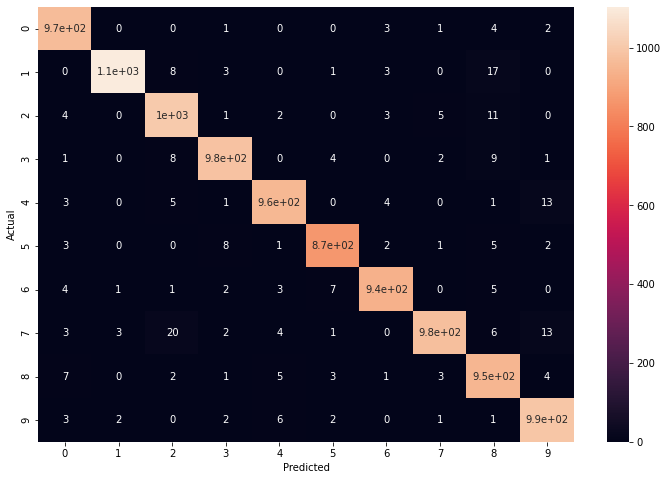

In [42]:
import seaborn as sns
plt.figure(figsize=(12,8))
sns.heatmap(cm,annot=True)
plt.xlabel("Predicted")
plt.ylabel("Actual")

Predicted value: 6



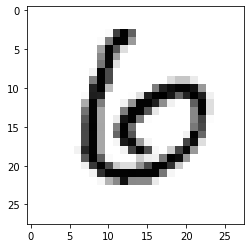

In [46]:
# Visualize some test prediction and corresponding digit 

test_index = 11

plt.imshow(x_test[test_index], cmap='Greys')
print(f"Predicted value: {y_pred_labels[test_index]}\n")

# conclusion:
In this task we have learned how to train a nural network for handwritten digit classification
